In [96]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [97]:
df=pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [98]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [100]:
df.shape

(20002, 15)

In [101]:
#check for null values
pd.isnull(df).sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [102]:

# Drop duplicate rows based on 'uniq_id' since it's a unique identifier

df.drop_duplicates(subset=['uniq_id'], inplace=True)



In [103]:
# Convert price columns to numeric and fill missing values with the median price

df['retail_price'].fillna(df['retail_price'].median(), inplace=True)
df['discounted_price'].fillna(df['discounted_price'].median(), inplace=True)



In [104]:
# Convert 'overall_rating' to numeric, replacing 'No rating available' with NaN and filling NaN with median rating

df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce')
df['overall_rating'].fillna(df['overall_rating'].median(), inplace=True)



In [105]:
# Fill missing brand names with 'Unknown'

df['brand'].fillna('Unknown', inplace=True)



In [106]:
# Remove unnecessary columns

df_cleaned = df.drop(columns=['uniq_id', 'crawl_timestamp', 'product_url', 'pid', 'image', 'description', 'product_specifications'])



In [107]:
# Show cleaned dataset info

df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20001 entries, 0 to 20000
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             20000 non-null  object 
 1   product_category_tree    20000 non-null  object 
 2   retail_price             20001 non-null  float64
 3   discounted_price         20001 non-null  float64
 4   is_FK_Advantage_product  20000 non-null  object 
 5   product_rating           20000 non-null  object 
 6   overall_rating           20001 non-null  float64
 7   brand                    20001 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


(None,
                             product_name  \
 0    Alisha Solid Women's Cycling Shorts   
 1    FabHomeDecor Fabric Double Sofa Bed   
 2                             AW Bellies   
 3    Alisha Solid Women's Cycling Shorts   
 4  Sicons All Purpose Arnica Dog Shampoo   
 
                                product_category_tree  retail_price  \
 0  ["Clothing >> Women's Clothing >> Lingerie, Sl...         999.0   
 1  ["Furniture >> Living Room Furniture >> Sofa B...       32157.0   
 2  ["Footwear >> Women's Footwear >> Ballerinas >...         999.0   
 3  ["Clothing >> Women's Clothing >> Lingerie, Sl...         699.0   
 4  ["Pet Supplies >> Grooming >> Skin & Coat Care...         220.0   
 
    discounted_price is_FK_Advantage_product       product_rating  \
 0             379.0                   False  No rating available   
 1           22646.0                   False  No rating available   
 2             499.0                   False  No rating available   
 3             26

In [108]:
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product     object
description                 object
product_rating              object
overall_rating             float64
brand                       object
product_specifications      object
dtype: object

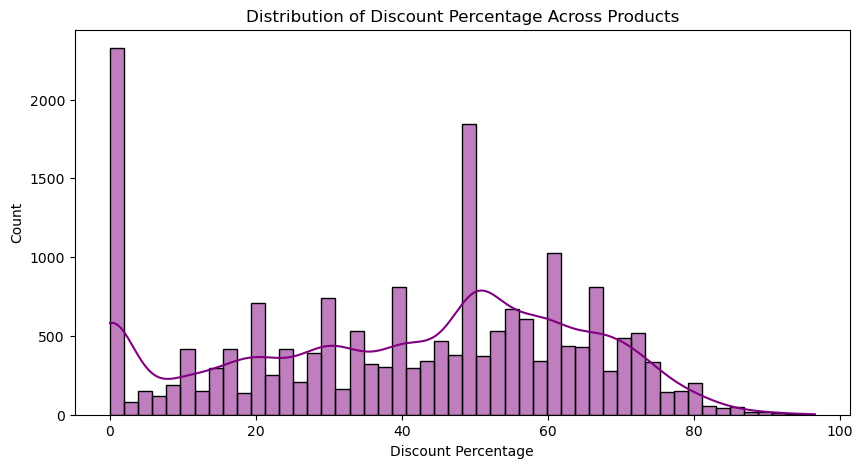

In [109]:
# 1. What is the average discount percentage across products?

df['discount_percent'] = ((df['retail_price'] - df['discounted_price']) / df['retail_price']) * 100

plt.figure(figsize=(10, 5))
sns.histplot(df['discount_percent'], bins=50, kde=True, color="purple")
plt.xlabel("Discount Percentage")
plt.ylabel("Count")
plt.title("Distribution of Discount Percentage Across Products")
plt.show()


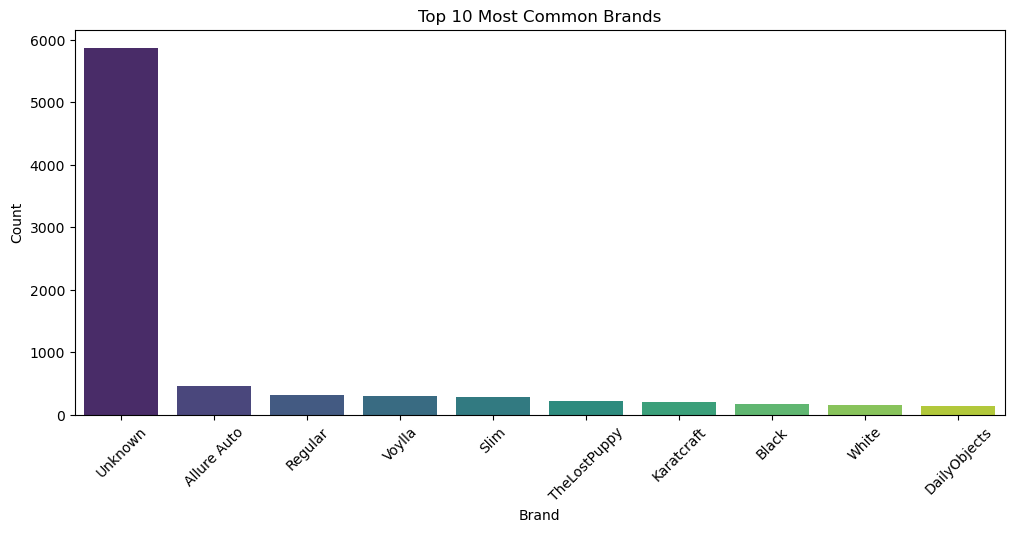

In [110]:
# 2. Count plot of top 10 brands

plt.figure(figsize=(12, 5))
top_brands = df_cleaned['brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Most Common Brands")
plt.show()

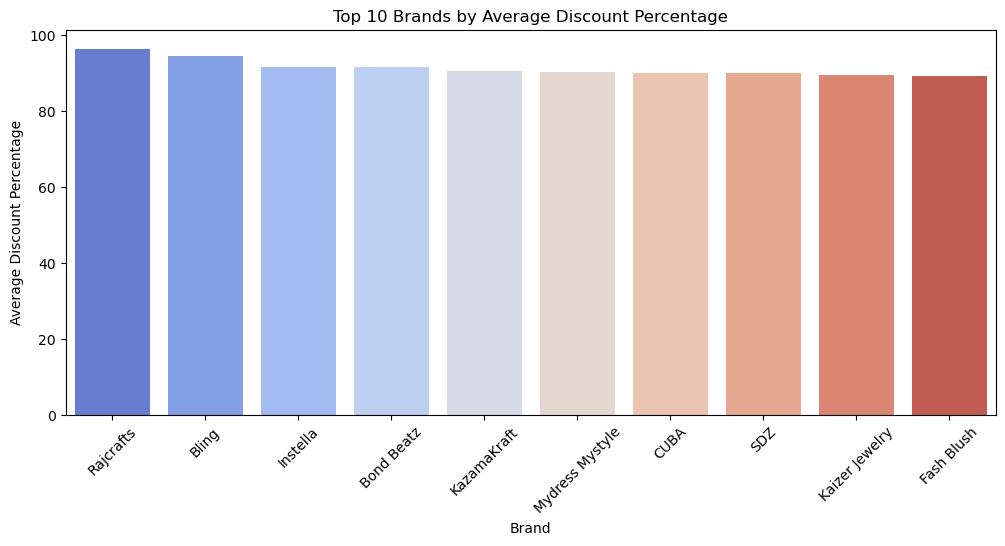

In [111]:
# 3.How does the discount percentage vary across different brands?
# Discount percentage variation by brand (Top 10 brands)

top_brand_discounts = df.groupby("brand")["discount_percent"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_brand_discounts.index, y=top_brand_discounts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Average Discount Percentage")
plt.title("Top 10 Brands by Average Discount Percentage")
plt.show()


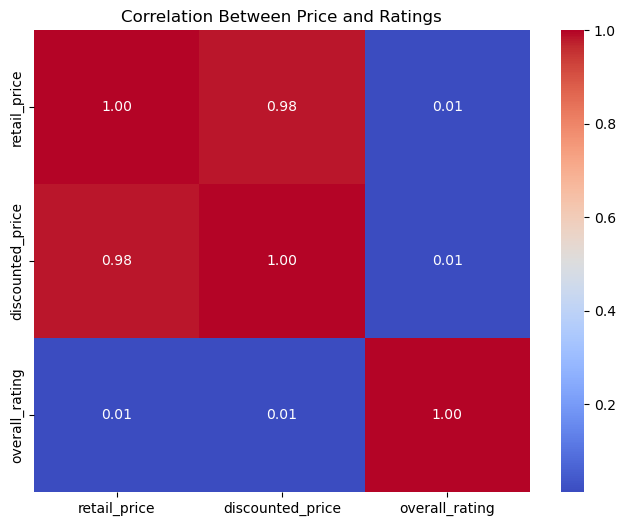

In [112]:
# 4.What is the correlation between retail price, discounted price, and overall rating?

plt.figure(figsize=(8, 6))
sns.heatmap(df[['retail_price', 'discounted_price', 'overall_rating']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Price and Ratings")
plt.show()



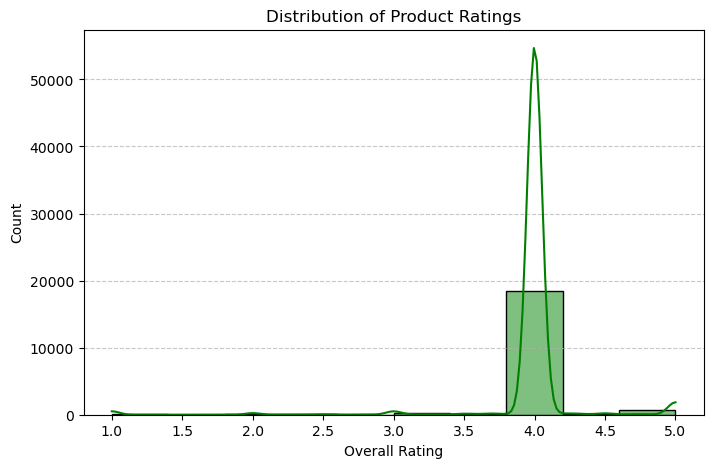

In [113]:
# 5. What is the distribution of product ratings?

plt.figure(figsize=(8, 5))
sns.histplot(df['overall_rating'], bins=10, kde=True, color="green")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.title("Distribution of Product Ratings")
plt.show()


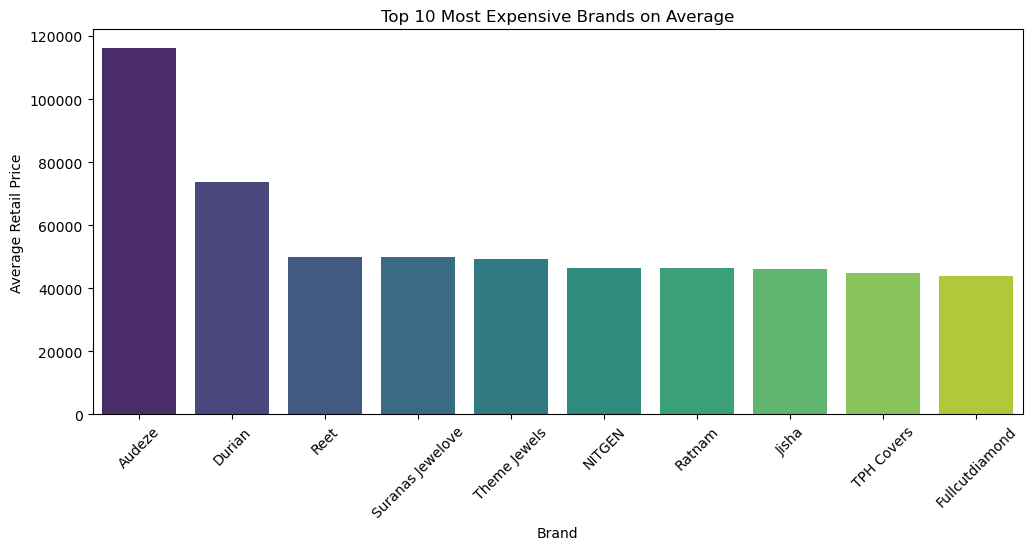

In [115]:
# 6. Which brands have the most expensive products on average? (Top 10)

top_expensive_brands = df_cleaned.groupby("brand")["retail_price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_expensive_brands.index, y=top_expensive_brands.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Average Retail Price")
plt.title("Top 10 Most Expensive Brands on Average")
plt.show()


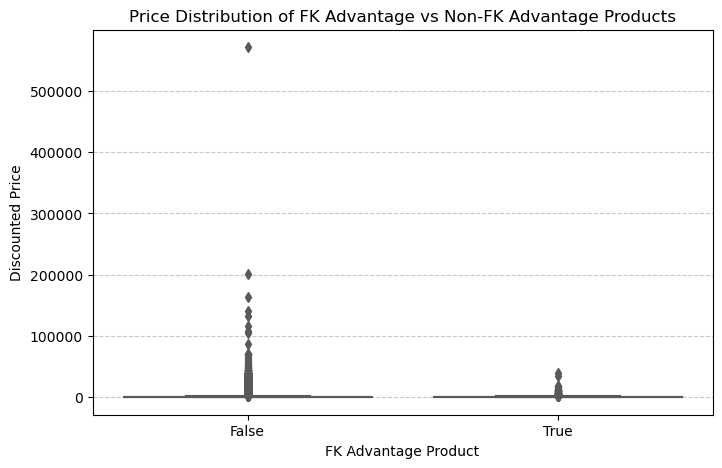

In [116]:
# 7. How many products are FK Advantage products, and what is their price distribution?

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['is_FK_Advantage_product'], y=df['discounted_price'], palette="Set2")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xlabel("FK Advantage Product")
plt.ylabel("Discounted Price")
plt.title("Price Distribution of FK Advantage vs Non-FK Advantage Products")
plt.show()


In [117]:
# 8. Which categories have the highest-rated products on average?

In [118]:
df['main_category'] = df['product_category_tree'].apply(lambda x: str(x).split(">>")[0].replace('["', '').strip())


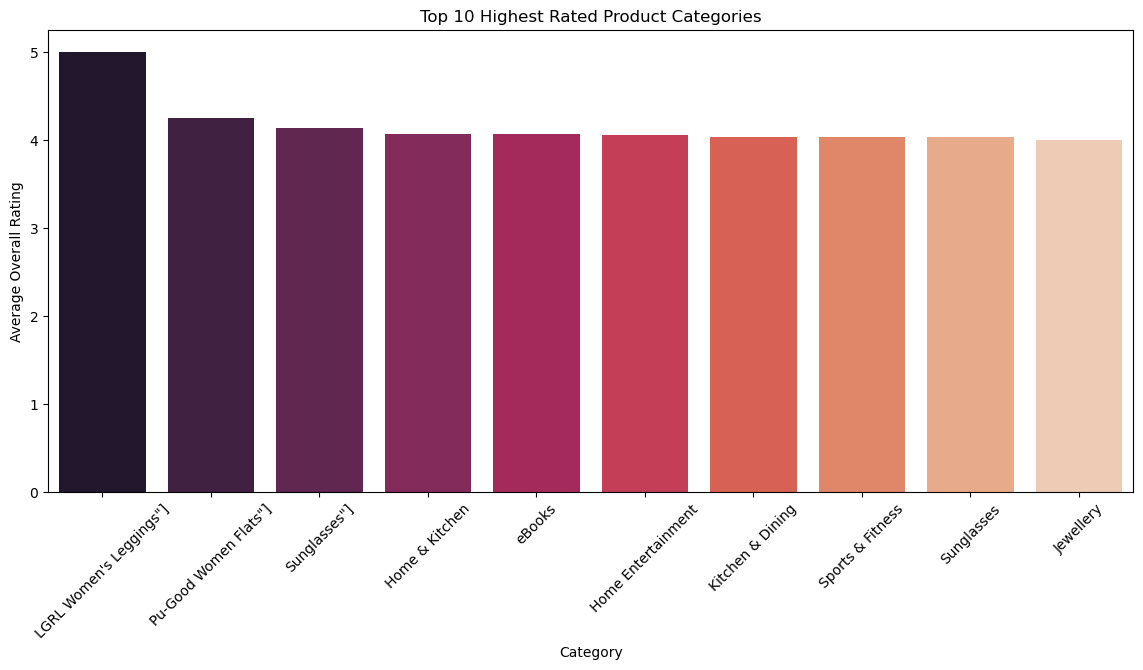

In [119]:
# Top-rated categories on average (Top 10)

top_rated_categories = df.groupby("main_category")["overall_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_rated_categories.index, y=top_rated_categories.values, palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Average Overall Rating")
plt.title("Top 10 Highest Rated Product Categories")
plt.show()
